#### Linear Regression

This notebook contains basic linear regression with mini-batch gradient descent using TensorFlow

In [1]:
import tensorflow as tf
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

# define function for generating batches
def get_batch(epoch, batch, batch_size):
    np.random.seed(epoch * NUM_BATCHES + batch)
    indices = np.random.randint(N, size=batch_size)
    x_batch = x_data_bias[indices]
    y_batch = y_data[indices]
    return x_batch, y_batch

In [2]:
# generate data for linear regression
N = 100

x_data = np.linspace(0, 10, N)
# add bias term
x_data_bias = np.c_[np.ones((N, 1)), x_data]
m = x_data_bias.shape[1]

y_data = -1.0 + 2.0*x_data + np.random.uniform(-1, 1, size=(N,))
y_data = y_data.reshape(-1, 1)

In [3]:
tf.reset_default_graph()

# create placeholders to feed data into
X = tf.placeholder(tf.float32, shape=(None, m), name='X')
y = tf.placeholder(tf.float32, shape=(None, 1), name='y')

# create weight and bias variables which are the parameters of model
W = tf.Variable(tf.random_normal([m, 1], -1.0, 1.0), name='W')
b = tf.Variable(0.0, name='b')

# prediction is x*W + b
y_pred = tf.add(tf.matmul(X, W), b, name='pred')
# use mse as loss
mse = tf.reduce_mean(tf.square(y_pred - y), name='mse')

# create optimizer, just use vanilla gradient descent
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
# training op will be run during training
training_op = optimizer.minimize(mse)

# operation that will initialize all variables when run
init = tf.global_variables_initializer()

In [4]:
# define some variables for training
NUM_EPOCHS = 100
BATCH_SIZE = 20
NUM_BATCHES = N // BATCH_SIZE

In [5]:
with tf.Session() as sess:
    # initialize variables
    sess.run(init)
    
    for epoch in range(NUM_EPOCHS):
        total_mse = 0
        for batch in range(NUM_BATCHES):
            # get random batch
            X_batch, y_batch = get_batch(epoch, batch, BATCH_SIZE)
            # run training op, which will also evaluate all other operations
            # that the training op depends on.
            _, mse_batch = sess.run([training_op, mse], 
                                    feed_dict={X: X_batch, y:y_batch})
            total_mse += mse_batch
        # print average mse every 5 epochs
        if epoch % 5 == 0:
            print('Epoch: {0}, Average mse: {1:.2f}'.format(epoch, total_mse / NUM_BATCHES))
    
    # get final (optimal) values for parameters W and b
    W_val, b_val = sess.run([W, b]) 

Epoch: 0, Average mse: 176.31
Epoch: 5, Average mse: 5.27
Epoch: 10, Average mse: 0.70
Epoch: 15, Average mse: 0.47
Epoch: 20, Average mse: 0.54
Epoch: 25, Average mse: 0.55
Epoch: 30, Average mse: 0.48
Epoch: 35, Average mse: 0.55
Epoch: 40, Average mse: 0.61
Epoch: 45, Average mse: 0.47
Epoch: 50, Average mse: 0.45
Epoch: 55, Average mse: 0.52
Epoch: 60, Average mse: 0.53
Epoch: 65, Average mse: 0.51
Epoch: 70, Average mse: 0.45
Epoch: 75, Average mse: 0.45
Epoch: 80, Average mse: 0.48
Epoch: 85, Average mse: 0.49
Epoch: 90, Average mse: 0.42
Epoch: 95, Average mse: 0.46


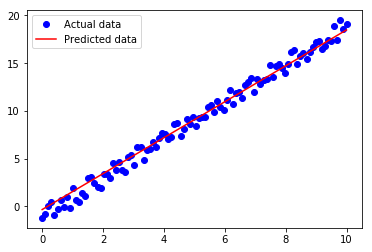

In [6]:
# plot the results
plt.plot(x_data, y_data, 'bo', label='Actual data')
plt.plot(x_data, np.dot(x_data_bias, W_val) + b_val, 'r', label='Predicted data')
plt.legend()
plt.show()